## Absolute Sentence Position Feature
This is the absolute position of the sentence in the text as the feature. It is normalized by
dividing with the number of sentences present in the conversation. For a sentence s in document
d, sentence position score, SPS(s, d) is given by,

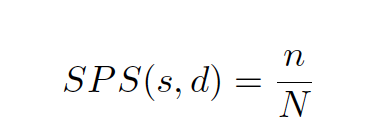

where n denotes the position of the sentence s, and N, the total number of sentences.

In [22]:
import csv
import gzip

from os.path import join

In [4]:
# CHAT_LOG_FILE = "gnue_irc_chat_logs.tsv.gz"
SUMMARIZED_CHAT_LOG_FILE = "summarized_chat_logs.csv.gz"
OUTPUT_DIR = "feature_outputs"

In [8]:
def get_absolute_sentence_position(sentence_index, total_number_of_sentences):
    return sentence_index / total_number_of_sentences

In [13]:
r1 = get_absolute_sentence_position(5, 230)
r2 = get_absolute_sentence_position(150, 230)
r3 = get_absolute_sentence_position(211, 230)
print("r1: {}\nr2: {}\nr3: {}".format(r1, r2, r3))

r1: 0.021739130434782608
r2: 0.6521739130434783
r3: 0.9173913043478261


In [41]:
def generate_absolute_sentence_positions(input_file, output_directory, output_file):
    with open('summarized_chat_date_partitions.csv', 'r') as chat_partitions, open(join(output_directory, output_file), 'w') as out_file:
        csv_row = chat_partitions.readline()
        while csv_row:
            total_chats = int(csv_row.rstrip().split(',')[2]) # Get only the count
            chat_count_in_date = 1 
            while chat_count_in_date <= total_chats:
                absolute_position = get_absolute_sentence_position(chat_count_in_date, total_chats)
                out_file.write("{}\n".format(absolute_position))
                # if chat_count_in_date >= 20:
                #    break
                chat_count_in_date += 1
            csv_row = chat_partitions.readline()

In [42]:
### CAREFUL WITH THIS. Might erase existing data file
generate_absolute_sentence_positions(SUMMARIZED_CHAT_LOG_FILE, OUTPUT_DIR, "summarized_absolute_sentence_positions.txt")